In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df = df.drop(labels = ['id'], axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
# Independent features
X = df.drop(labels = ['price'], axis = 1)
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [6]:
# Target variable
y = df['price']
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [7]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[X.dtypes != 'object']

print('Categorical Columns:', cat_cols)
print('Numerical Columns:', num_cols)

Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')
Numerical Columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [9]:
features = df[num_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X[num_cols] = features
X.head(20)

,carat,cut,color,clarity,depth,table,x,y,z
0,1.576255,Premium,F,VS2,0.350768,0.402496,1.401353,1.460456,1.474414
1,2.678513,Very Good,J,SI2,0.165874,0.402496,2.113437,2.177120,2.200187
2,-0.196003,Ideal,G,VS1,-0.573702,-0.118652,-0.022816,0.008986,-0.049710
3,-1.017293,Ideal,G,VS1,-0.203914,-0.639801,-1.203614,-1.188477,-1.196432
4,1.965288,Premium,G,VS2,0.720555,0.923644,1.743874,1.714463,1.793754
5,1.554642,Very Good,J,SI1,0.905449,0.402496,1.464449,1.424169,1.532476
6,-0.109551,Ideal,E,VS2,-0.019020,-0.118652,0.040280,0.063416,0.051898
7,1.187223,Premium,G,SI2,0.628108,-0.118652,1.157982,1.206449,1.227651
8,-1.060519,Ideal,F,IF,0.165874,-0.639801,-1.230655,-1.224764,-1.210947
9,-1.060519,Good,J,VS1,1.645025,-0.118652,-1.311778,-1.306409,-1.181917


In [10]:
features = df[cat_cols]
scaler = OrdinalEncoder().fit(features.values)
features = scaler.transform(features.values)
X[cat_cols] = features
X.head(20)

,carat,cut,color,clarity,depth,table,x,y,z
0,1.576255,3.0,2.0,5.0,0.350768,0.402496,1.401353,1.460456,1.474414
1,2.678513,4.0,6.0,3.0,0.165874,0.402496,2.113437,2.177120,2.200187
2,-0.196003,2.0,3.0,4.0,-0.573702,-0.118652,-0.022816,0.008986,-0.049710
3,-1.017293,2.0,3.0,4.0,-0.203914,-0.639801,-1.203614,-1.188477,-1.196432
4,1.965288,3.0,3.0,5.0,0.720555,0.923644,1.743874,1.714463,1.793754
5,1.554642,4.0,6.0,2.0,0.905449,0.402496,1.464449,1.424169,1.532476
6,-0.109551,2.0,1.0,5.0,-0.019020,-0.118652,0.040280,0.063416,0.051898
7,1.187223,3.0,3.0,3.0,0.628108,-0.118652,1.157982,1.206449,1.227651
8,-1.060519,2.0,2.0,1.0,0.165874,-0.639801,-1.230655,-1.224764,-1.210947
9,-1.060519,1.0,6.0,4.0,1.645025,-0.118652,-1.311778,-1.306409,-1.181917


In [11]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [13]:
#X_train.head()

In [18]:
#train models function
def train_models(models):
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(X_train,y_train)

        #Make Predictions
        y_pred=model.predict(X_test)

        mae, rmse, r2_square=model_evaluation(y_test,y_pred)

        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])

        print('Model Performance')
        print("RMSE:",rmse)
        print("MAE:",mae)
        print("R2 score",r2_square*100)

        r2_list.append(r2_square)
    
        print('-'*30)
        print('\n')
        

In [19]:
def model_evaluation(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [17]:
reg_models={
    'Linear Regression':LinearRegression(),
    'Lasso Regression':Lasso(),
    'Ridge Regression':Ridge()
}

#print(len(models))

model_list = []
r2_list = []

train_models(reg_models)
#print(model_list)
#print(r2_list)

Linear Regression
Model Performance
RMSE: 1108.371070612037
MAE: 708.9553661559241
R2 score 92.39746882209441
------------------------------


Lasso Regression
Model Performance
RMSE: 1108.3972812149827
MAE: 710.0043641750827
R2 score 92.39710925067021
------------------------------


Ridge Regression
Model Performance
RMSE: 1108.37754274796
MAE: 708.9794817603324
R2 score 92.3973800345753
------------------------------


['Linear Regression', 'Lasso Regression', 'Ridge Regression']
[0.9239746882209441, 0.9239710925067021, 0.923973800345753]


In [22]:
from xgboost import XGBRegressor

xgb_models = {
'XGB_linear' : XGBRegressor(booster = 'gblinear', objective ='reg:linear', n_estimators = 10, seed = 42),
'XGB_tree' : XGBRegressor(booster = 'gbtree', objective ='reg:linear', n_estimators = 10, seed = 42),
'XGB_dart' : XGBRegressor(booster = 'dart', objective ='reg:linear', n_estimators = 10, seed = 42)
}

train_models(xgb_models)

C:\Users\jbsch\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:49:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB_linear
Model Performance
RMSE: 1354.369622247845
MAE: 998.4810035438605
R2 score 88.64826472621462
------------------------------




C:\Users\jbsch\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:49:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB_tree
Model Performance
RMSE: 632.3379426084142
MAE: 345.1305982613633
R2 score 97.52550642816414
------------------------------




C:\Users\jbsch\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:49:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB_dart
Model Performance
RMSE: 632.3379314692647
MAE: 345.1305935412075
R2 score 97.52550651534457
------------------------------




In [34]:
xgb_models = {
'XGB_linear' : XGBRegressor(booster = 'gblinear', objective ='reg:linear', n_estimators = 10, seed = 42, learning_rate = 0.45),
'XGB_tree' : XGBRegressor(booster = 'gbtree', objective ='reg:linear', n_estimators = 10, seed = 42, learning_rate = 0.45),
'XGB_dart' : XGBRegressor(booster = 'dart', objective ='reg:linear', n_estimators = 10, seed = 42, learning_rate = 0.45)
}

train_models(xgb_models)

C:\Users\jbsch\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:55:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB_linear
Model Performance
RMSE: 1372.1792467510606
MAE: 1007.369120370161
R2 score 88.34775682504585
------------------------------




C:\Users\jbsch\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:55:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB_tree
Model Performance
RMSE: 604.8342928349618
MAE: 316.4350579683898
R2 score 97.73608217051252
------------------------------




C:\Users\jbsch\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:55:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGB_dart
Model Performance
RMSE: 604.8342910114394
MAE: 316.4350689652702
R2 score 97.73608218416354
------------------------------




In [41]:
xgb_models = {
'XGB_linear' : XGBRegressor(booster = 'gblinear', objective ='reg:squarederror', n_estimators = 10, seed = 42, learning_rate = 0.45),
'XGB_tree' : XGBRegressor(booster = 'gbtree', objective ='reg:squarederror', n_estimators = 10, seed = 42, learning_rate = 0.45),
'XGB_dart' : XGBRegressor(booster = 'dart', objective ='reg:squarederror', n_estimators = 10, seed = 42, learning_rate = 0.45)
}

train_models(xgb_models)

XGB_linear
Model Performance
RMSE: 1372.5212399109557
MAE: 1011.0238526598254
R2 score 88.34194784044115
------------------------------


XGB_tree
Model Performance
RMSE: 604.8342928349618
MAE: 316.4350579683898
R2 score 97.73608217051252
------------------------------


XGB_dart
Model Performance
RMSE: 604.8342910114394
MAE: 316.4350689652702
R2 score 97.73608218416354
------------------------------




In [ ]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Define the hyperparameter search space
param_dist = {
    #'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'lambda': [0, 0.1, 0.2, 0.3, 0.4]
}

#xgb model
xgb_model = XGBRegressor(booster = 'dart', objective ='reg:squarederror', n_estimators = 10, seed = 42, learning_rate = 0.45)

# RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)
 
# Get the best hyperparameters
best_params = random_search.best_params_
 
# Fit the model with the best hyperparameters on the entire dataset
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)
 
# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print('RandomizedSearchCV')
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on test set: {accuracy:.2f}")



In [ ]:
# GridSearchCV
grid_search = GridSearchCV(xgb_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
grid_search.fit(X_train, y_train)
 
# Get the best hyperparameters
best_params = grid_search.best_params_
 
# Fit the model with the best hyperparameters on the entire dataset
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
 
# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print('GridSearchCV')
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on test set: {accuracy:.2f}")

In [38]:
df[cat_cols] = features
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,3.0,2.0,5.0,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4.0,6.0,3.0,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,2.0,3.0,4.0,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,2.0,3.0,4.0,61.6,56.0,4.38,4.41,2.71,666
4,1.70,3.0,3.0,5.0,62.6,59.0,7.65,7.61,4.77,14453


<Axes: >

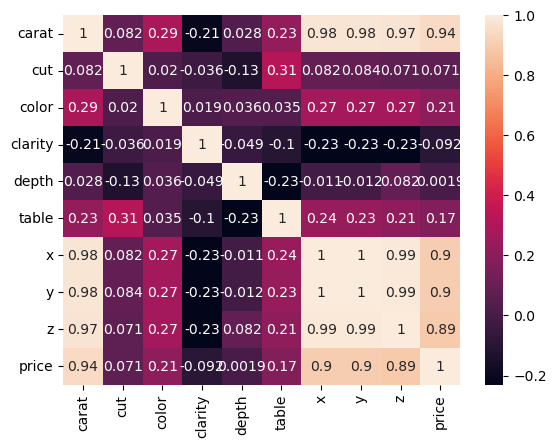

In [33]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)